# Sabitlik Testleri

## The Augmented Dickey-Fuller (ADF) 
- ADF testi, bir zaman serisinin **durağanlığını** test etmek için uygun yöntem olan **'Birim Kök Testi'** adı verilen bir test kategorisine aittir.
- Birim kök, bir zaman serisinin onu durağan olmayan hale getiren bir özelliğidir.
- Bir birim kökün varlığı, zaman serisinin durağan olmadığı anlamına gelir.sınız.
- Paket, içindeki işlev aracılığıyla ADF testinin güvenilir bir şekilde python üzerinde uygulanmasını sağlar. Aşağıdaki çıktıları döndürür:
- P değeri
- Test istatistiğinin değeri
- Test için dikkate alınan gecikme sayısı
- Kritik değer kesintileri.
- **Test istatistiği gösterilen kritik değerden düşük olduğunda, sıfır hipotezini reddedersiniz ve zaman serisinin durağan olduğu sonucuna varırsınız.**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df = pd.read_csv("monthly-milk-production-pounds.csv")
df=df.dropna()
df.head(5)

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


**Soru 1 :** Bu veri seti, Aylık süt üretimi ile ilgilidir.ADF testini bu veri setinde uygulayıp veri setinin durağan olup olmadığını bulunuz.
- H0: Birim kök vardır, yani seri durağan değildir.
- H1: Birim kök yoktur, yani seri durağandır.

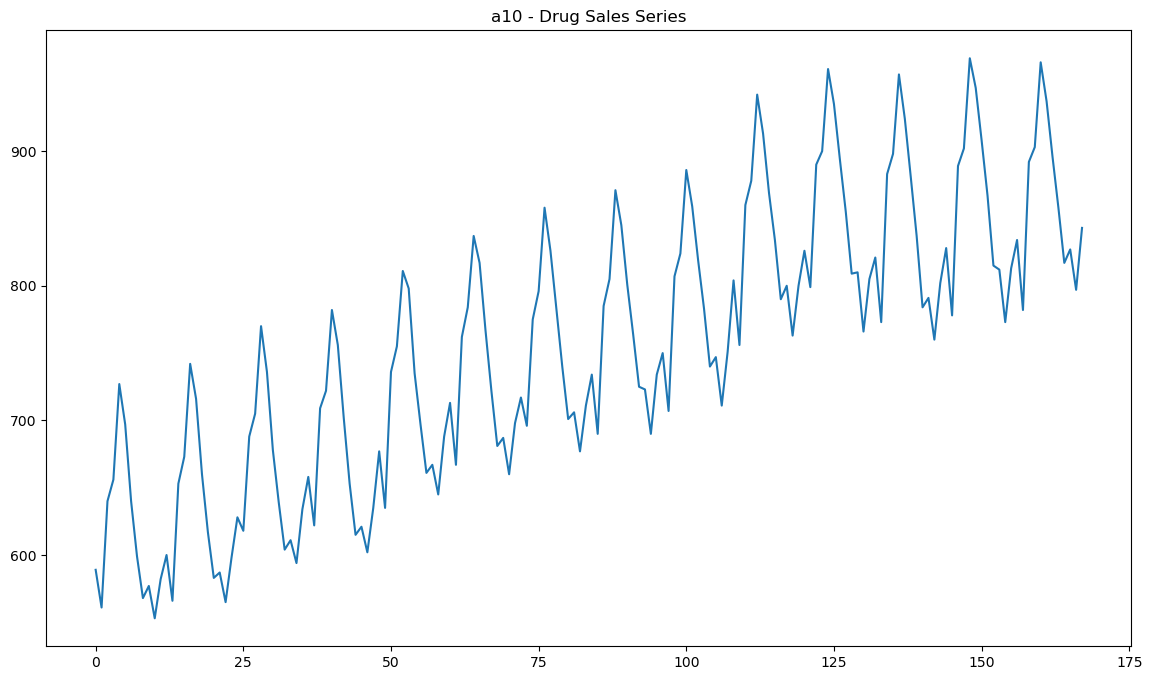

In [90]:
from statsmodels.tsa.stattools import adfuller
%matplotlib inline
series = df.loc[:, 'Monthly milk production: pounds per cow. Jan 62 ? Dec 75'].values
df.plot(figsize=(14,8), legend=None, title='a10 - Drug Sales Series');

In [92]:
# ADF Test
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

ADF Statistic: -1.3038115874221228
p-value: 0.6274267086030347
Critial Values:
   1%, -3.473542528196209
Critial Values:
   5%, -2.880497674144038
Critial Values:
   10%, -2.576878053634677


In [94]:
for key, value in result[4].items():
      if result[0] < value:
          print("Birim kök yoktur, yani seri durağandır.(H0 reddedilir)")
      else:
          print("Birim kök vardır, yani seri durağan değildir.(H0 kabul edilir)")
          

Birim kök vardır, yani seri durağan değildir.(H0 kabul edilir)
Birim kök vardır, yani seri durağan değildir.(H0 kabul edilir)
Birim kök vardır, yani seri durağan değildir.(H0 kabul edilir)


In [96]:
if result[1] > 0.05:
 print('Seri durağan değildir.')
else:
 print('Seri durağandır.')

Seri durağan değildir.


## KPSS Testi (Kwiatkowski-Phillips-Schmidt-Shin)
- KPSS testi, bir serinin deterministik bir eğilim etrafındaki durağanlığını kontrol etmek için kullanılan istatistiksel bir testtir.
- ADF testinden önemli bir fark, KPSS testinin **sıfır hipotezi, serinin durağan olmasıdır**.
- Yani pratik olarak, p-değerinin yorumlanması birbirinin tam tersidir.
- Yani, p değeri < anlam seviyesi ise (diyelim ki 0.05), o zaman seri durağan değildir

In [103]:
df = pd.read_csv("daily-total-female-births.csv")
df=df.dropna()
df.head(5)

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


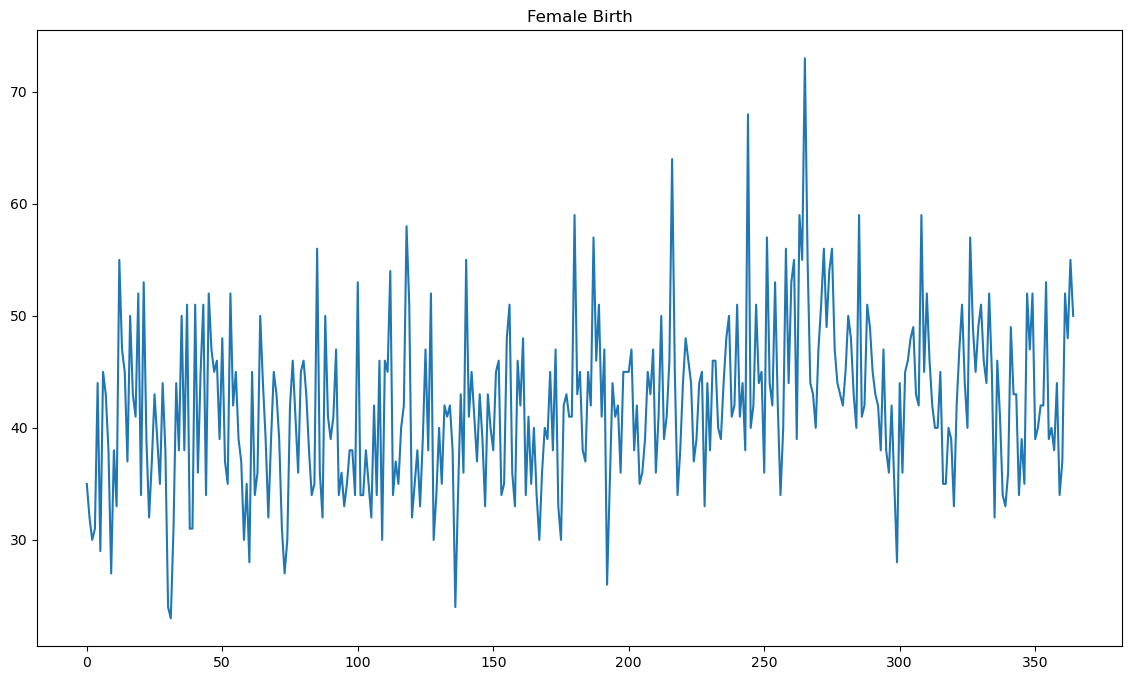

In [106]:
df.plot(title='Female Birth', figsize=(14,8), legend=None);

- H0: zaman serisi trend durağandır.
- H1: zaman serisi trend durağan değildir.

In [112]:
result = kpss(df['Births'], regression='c')  # 'c' for level stationarity, 'ct' for trend stationarity

# Sonuçları yazdırma
print('KPSS Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[3])

# Sonuçları yorumlama
alpha = 0.05
if result[1] < alpha:
    print("Null Hipotez reddedilir; veri serisi durağan değildir.")
else:
    print("Null Hipotez reddedilemez; veri serisi durağandır.")

KPSS Statistic: 1.6129657593856859
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Null Hipotez reddedilir; veri serisi durağan değildir.


C:\Users\dilan\AppData\Local\Temp\ipykernel_11224\4199941243.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df['Births'], regression='c')  # 'c' for level stationarity, 'ct' for trend stationarity
